# EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

## 1: Understanding the data

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
data.shape

(1000, 8)

In [13]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [17]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [18]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [19]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

## 2: Cleaning the data

In [69]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [70]:
student = data.drop(['race/ethnicity','parental level of education'],axis=1)

In [71]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [72]:
student.tail()

,gender,lunch,test preparation course,math score,reading score,writing score
995,female,standard,completed,88,99,95
996,male,free/reduced,none,62,55,55
997,female,free/reduced,completed,59,71,65
998,female,standard,completed,68,78,77
999,female,free/reduced,none,77,86,86


## 3: Relationship analysis

In [35]:
corelation = student.corr()

C:\Users\achyu\AppData\Local\Temp\ipykernel_4932\2024405513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = student.corr()


<Axes: >

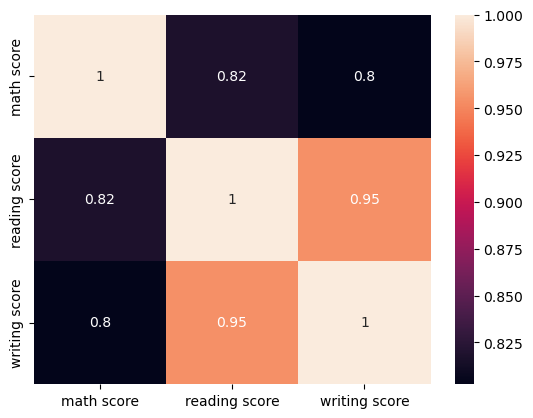

In [36]:
sns.heatmap(corelation, xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

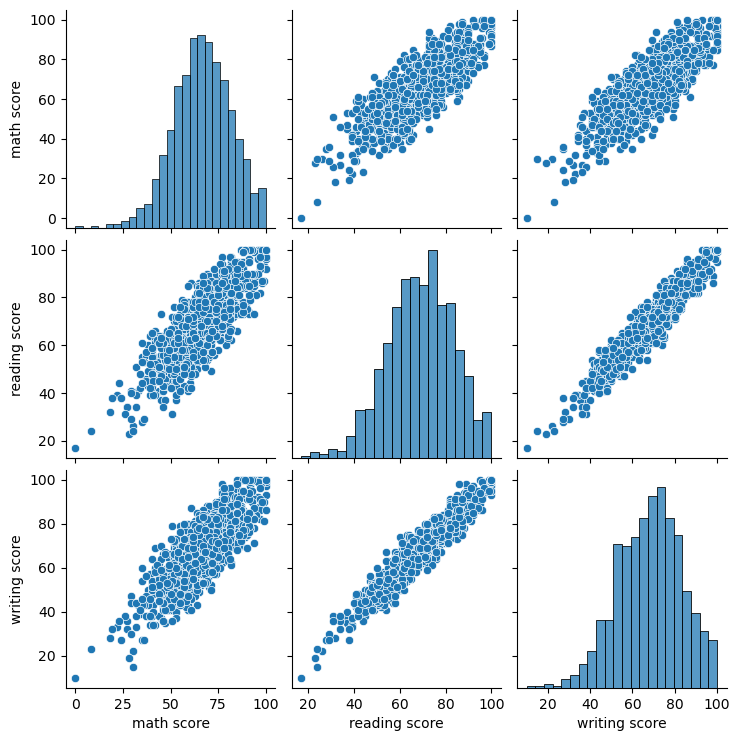

In [38]:
sns.pairplot(student)

<Axes: xlabel='math score', ylabel='reading score'>

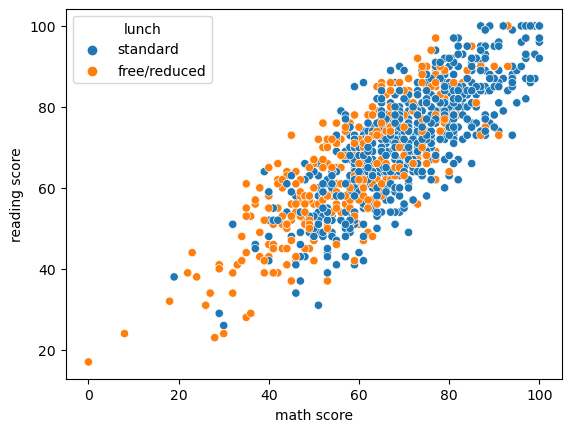

In [48]:
sns.scatterplot(x= 'math score',y='reading score',hue='lunch',data=student)

<Axes: xlabel='math score', ylabel='reading score'>

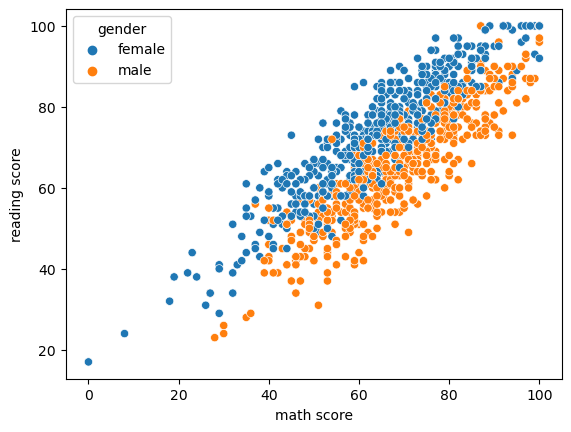

In [61]:
sns.scatterplot(x= 'math score',y='reading score',hue='gender',data=student)

<Axes: xlabel='math score', ylabel='reading score'>

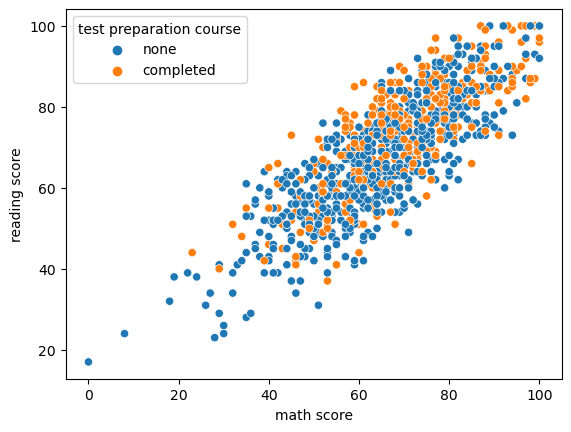

In [62]:
sns.scatterplot(x= 'math score',y='reading score',hue='test preparation course',data=student)

C:\Users\achyu\AppData\Local\Temp\ipykernel_4932\3821677395.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['math score'],bins=5)


<Axes: xlabel='math score', ylabel='Density'>

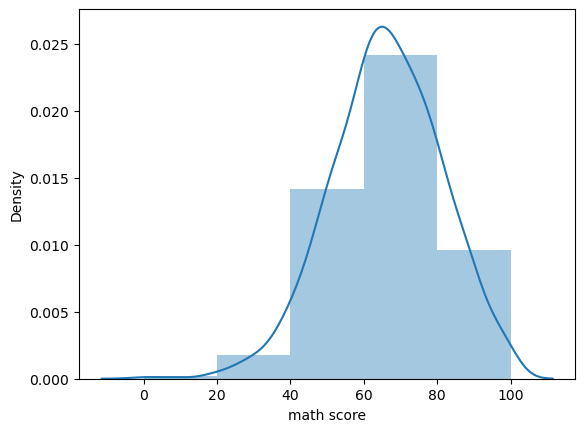

In [52]:
sns.distplot(student['math score'],bins=5)

C:\Users\achyu\AppData\Local\Temp\ipykernel_4932\2513929967.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['reading score'],bins=5)


<Axes: xlabel='reading score', ylabel='Density'>

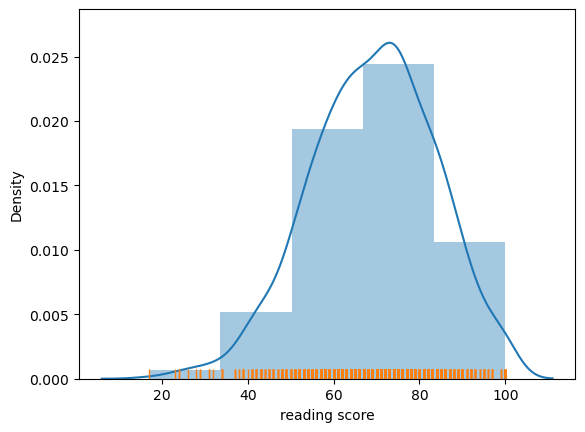

In [65]:
sns.distplot(student['reading score'],bins=5)
sns.rugplot(student['reading score'])

C:\Users\achyu\AppData\Local\Temp\ipykernel_4932\2182857048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['writing score'],bins=5)


<Axes: xlabel='writing score', ylabel='Density'>

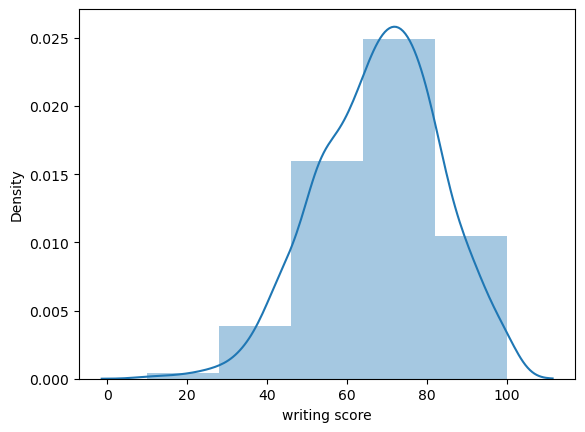

In [54]:
sns.distplot(student['writing score'],bins=5)

<Axes: xlabel='writing score', ylabel='Count'>

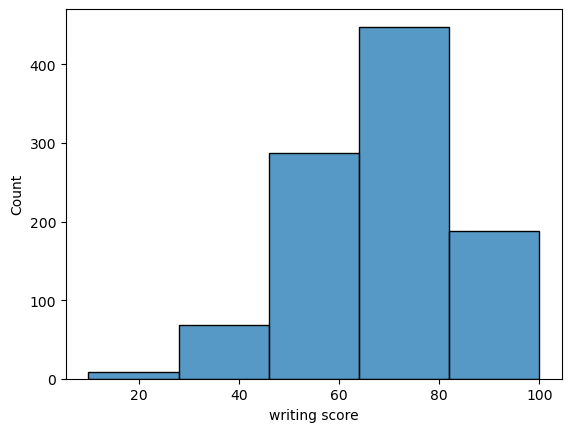

In [56]:
sns.histplot(student['writing score'],bins=5)

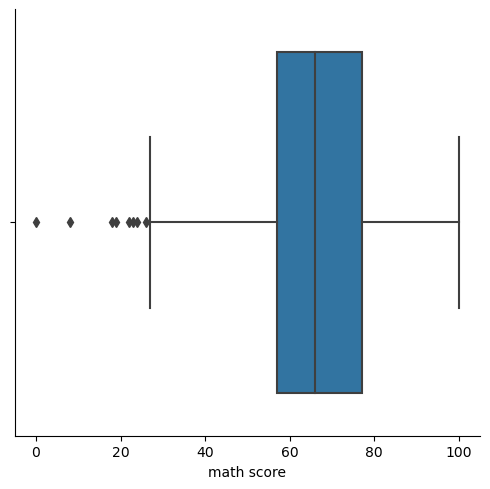

In [58]:
sns.catplot(x='math score', kind= 'box', data = student)

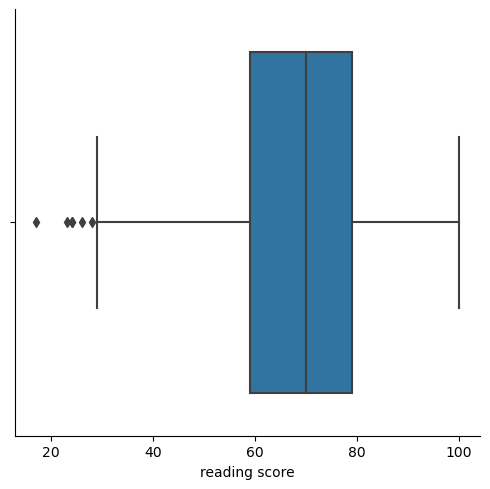

In [60]:
sns.catplot(x='reading score', kind= 'box', data = student)

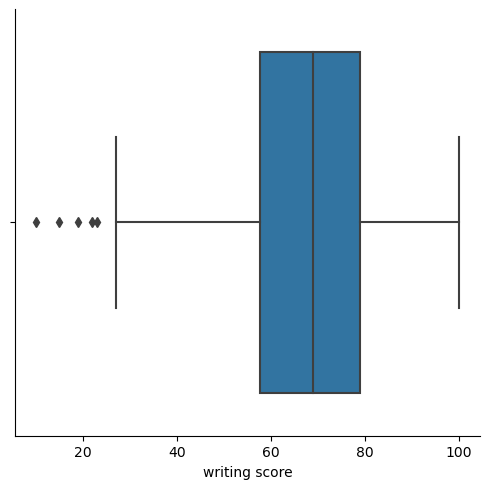

In [91]:
sns.catplot(x='writing score', kind= 'box', data = student)

## 4: Statistical summary

In [77]:
student.mean()

C:\Users\achyu\AppData\Local\Temp\ipykernel_4932\262002444.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  student.mean()


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [78]:
student.median()

C:\Users\achyu\AppData\Local\Temp\ipykernel_4932\3256656841.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  student.median()


math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

In [83]:
student.mode()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,65,72,74


In [81]:
student.sum()

gender                     femalefemalefemalemalemalefemalefemalemalemale...
lunch                      standardstandardstandardfree/reducedstandardst...
test preparation course    nonecompletednonenonenonenonecompletednonecomp...
math score                                                             66089
reading score                                                          69169
writing score                                                          68054
dtype: object

In [84]:
student.max()

gender                         male
lunch                      standard
test preparation course        none
math score                      100
reading score                   100
writing score                   100
dtype: object

In [89]:
student.min()

gender                           female
lunch                      free/reduced
test preparation course       completed
math score                            0
reading score                        17
writing score                        10
dtype: object

In [90]:
student.std()

C:\Users\achyu\AppData\Local\Temp\ipykernel_4932\2061004314.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  student.std()


math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64